In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv",sep = ';')
#sep is used to seperate coulmn name assigned with data and starts from 0 index for columns; how the data items are separated in our CSV file here in dataset data is seperated by semicolon so we sep as semicoln here.

In [2]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [5]:
len(df['quality'].unique())

6

In [6]:
df['quality'].nunique()

6

In [7]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [9]:
df.duplicated().sum()


240

In [10]:
df=df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(1359, 12)

In [13]:
demo_df=pd.DataFrame([1,2,3,3,23,2,1,2,123,333])

In [14]:
demo_df

,0
0,1
1,2
2,3
3,3
4,23
5,2
6,1
7,2
8,123
9,333


In [15]:
demo_df.duplicated().sum()

4

In [16]:
X=df.drop("quality",axis=1)

In [17]:
y=df['quality']

# TRAIN TEST SPLIT

In [18]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=10)

In [20]:
'''from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()
scr.fit()
scr.transform()'''

#For Decision tree Scaling is not required. WHY?


'from sklearn.preprocessing import StandardScaler\nfrom sklearn.preprocessing import StandardScaler\nsclr = StandardScaler()\nscr.fit()\nscr.transform()'

# 1. Decision Tree Algo

In [21]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [22]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [23]:
model.score(X_train,y_train)
#training accuracy

1.0

In [24]:
y_predict=model.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(y_test,y_predict)

0.5011135857461024

# Hyperparameter tunning

**Applying Grid Search CV in case of DecisionTree**

In [27]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}
#another hyperparameter 'logloss' is a probability based formulae which is used for Binary Split.

In [28]:
from sklearn.model_selection import GridSearchCV
grid_searh=GridSearchCV(estimator=model,param_grid=grid_param,cv=5)

In [29]:
grid_searh.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

**Selecting Best Parameters from GridSearchCV**

In [30]:
grid_searh.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 8,
 'min_samples_split': 4,
 'splitter': 'random'}

In [31]:
model_with_best_params=DecisionTreeClassifier(criterion= 'gini',max_depth= 6,min_samples_leaf= 8,min_samples_split= 4,splitter='random')

In [32]:
model_with_best_params.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, min_samples_split=4,
                       splitter='random')

In [33]:
y_prediction2=model_with_best_params.predict(X_test)

In [34]:
accuracy_score(y_test,y_prediction2)

0.5478841870824054

**observation**
 - Accuracy incereases after using grid search cv

In [76]:
#logistic regression, SVM ,  going forward(RF,XB,GB,AB)

In [77]:
'''
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
'''

'\nfrom sklearn.tree import DecisionTreeClassifier\nmodel=DecisionTreeClassifier()\n'

[Text(0.4822230538922156, 0.9705882352941176, 'X[10] <= 10.15\ngini = 0.645\nsamples = 910\nvalue = [7, 31, 389, 359, 114, 10]'),
 Text(0.21418880988023953, 0.9117647058823529, 'X[6] <= 62.5\ngini = 0.495\nsamples = 459\nvalue = [3, 15, 298, 131, 12, 0]'),
 Text(0.11363211077844311, 0.8529411764705882, 'X[1] <= 0.548\ngini = 0.571\nsamples = 282\nvalue = [3, 11, 151, 105, 12, 0]'),
 Text(0.05694860279441118, 0.7941176470588235, 'X[9] <= 0.585\ngini = 0.596\nsamples = 136\nvalue = [1, 4, 52, 68, 11, 0]'),
 Text(0.01996007984031936, 0.7352941176470589, 'X[7] <= 0.996\ngini = 0.512\nsamples = 44\nvalue = [0, 4, 28, 12, 0, 0]'),
 Text(0.007984031936127744, 0.6764705882352942, 'X[9] <= 0.435\ngini = 0.245\nsamples = 14\nvalue = [0, 2, 12, 0, 0, 0]'),
 Text(0.003992015968063872, 0.6176470588235294, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]'),
 Text(0.011976047904191617, 0.6176470588235294, 'X[5] <= 21.5\ngini = 0.142\nsamples = 13\nvalue = [0, 1, 12, 0, 0, 0]'),
 Text(0.0079840319

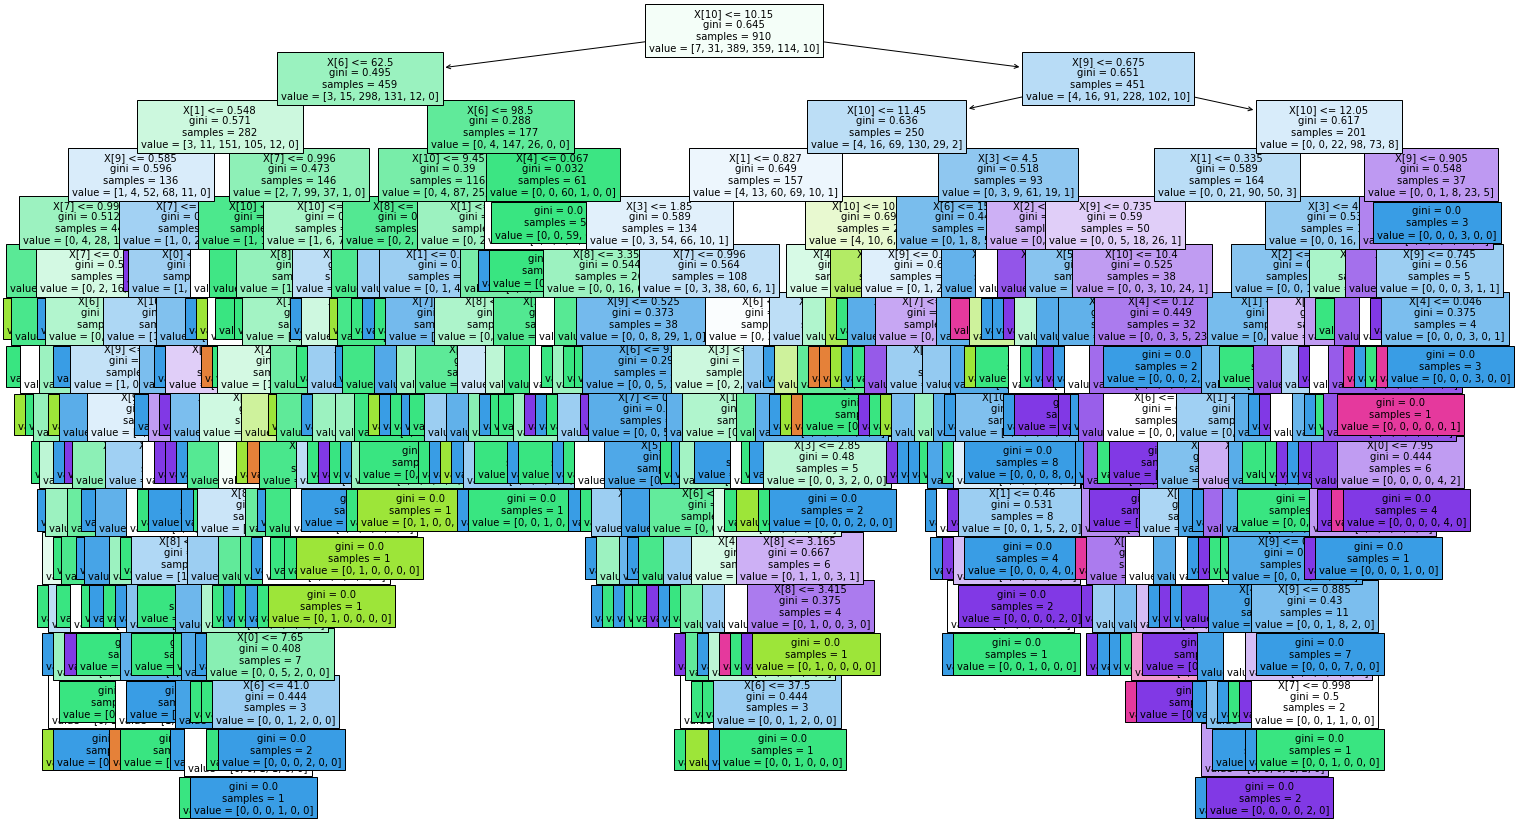

In [81]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model, filled=True,fontsize=10)

#full decision tree till full dept; here we can se by default gini impuruity with Binary classification 

In [79]:
fig.savefig("decistion_tree_classifier.png")

[Text(0.5219298245614035, 0.9166666666666666, 'X[10] <= 10.15\ngini = 0.645\nsamples = 910\nvalue = [7, 31, 389, 359, 114, 10]'),
 Text(0.27631578947368424, 0.75, 'X[6] <= 62.5\ngini = 0.495\nsamples = 459\nvalue = [3, 15, 298, 131, 12, 0]'),
 Text(0.14035087719298245, 0.5833333333333334, 'X[1] <= 0.548\ngini = 0.571\nsamples = 282\nvalue = [3, 11, 151, 105, 12, 0]'),
 Text(0.07017543859649122, 0.4166666666666667, 'X[9] <= 0.585\ngini = 0.596\nsamples = 136\nvalue = [1, 4, 52, 68, 11, 0]'),
 Text(0.03508771929824561, 0.25, 'X[7] <= 0.996\ngini = 0.512\nsamples = 44\nvalue = [0, 4, 28, 12, 0, 0]'),
 Text(0.017543859649122806, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.05263157894736842, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.10526315789473684, 0.25, 'X[7] <= 0.996\ngini = 0.547\nsamples = 92\nvalue = [1, 0, 24, 56, 11, 0]'),
 Text(0.08771929824561403, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.12280701754385964, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.210526315789

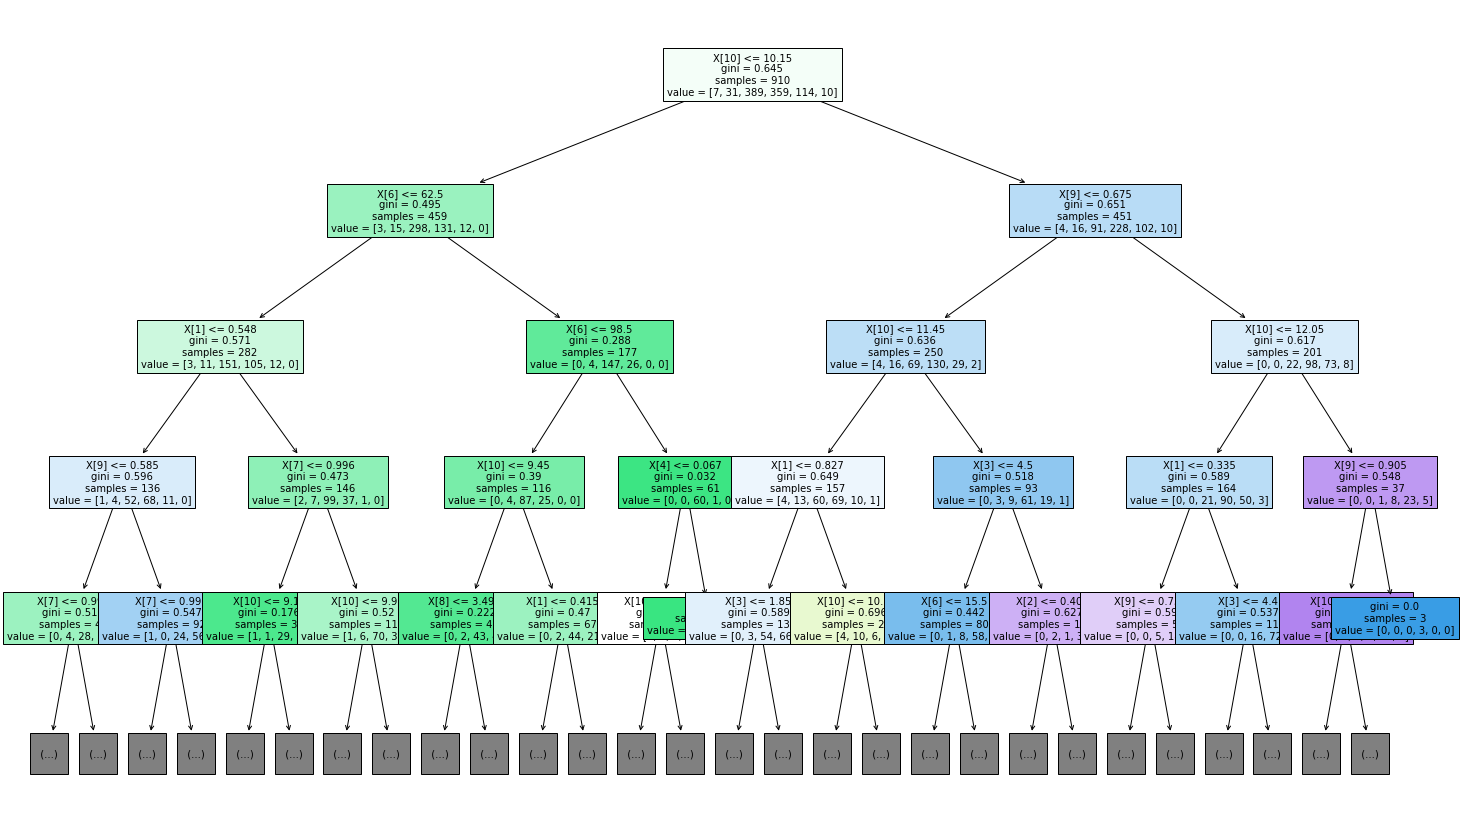

In [83]:
#now with max_dept=4

from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model, max_depth=4, filled=True, fontsize=10)

# 2. Random Forest Classifier

In [ ]:
# import Random forest classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
RF_MODEL = RandomForestClassifier()

In [38]:
RF_MODEL.fit(X_train,y_train)

RandomForestClassifier()

In [39]:
RF_MODEL.score(X_train,y_train)
#training accuracy

1.0

In [41]:
y_predict_rf = RF_MODEL.predict(X_test)
y_predict_rf 

array([6, 6, 6, 5, 5, 5, 5, 6, 6, 7, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6,
       6, 5, 6, 5, 5, 6, 5, 5, 7, 6, 6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 7, 5, 6, 5, 6, 7, 5, 5, 6,
       5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 6, 7, 5, 5, 5, 5, 5, 5, 7,
       5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 5, 5,
       5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 3, 5, 6, 7, 6, 5, 5, 5, 5, 6, 5,
       5, 5, 7, 5, 6, 5, 5, 7, 6, 5, 7, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6,
       6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 6,
       7, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 5, 7, 5, 5, 5, 6, 6, 3, 5,
       6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 7, 5, 5, 5, 5, 6, 6,
       5, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 5, 4, 5, 5,
       5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 6, 7, 6, 7, 6, 7, 6, 6, 5, 5,
       6, 6, 6, 6, 5, 6, 6, 6, 7, 6, 6, 6, 7, 6, 6, 6, 6, 7, 6, 6, 5, 6,
       5, 6, 5, 5, 5, 5, 5, 7, 6, 6, 5, 6, 7, 5, 6,

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict_rf)

0.5879732739420935

**OBSERVATION**
- HERE WE ARE ABLE TO INCREASE ACCURACY FROM 54.7 TO 58.7

# Applying Grid Search CV to increase more accuracy in RFC

In [44]:
grid_param_rf = {
    'n_estimators': [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto', 'log2']
    
}

In [46]:
from sklearn.model_selection import GridSearchCV
grid_searh_rf=GridSearchCV(estimator=RF_MODEL,param_grid=grid_param_rf,cv=3,verbose=1,n_jobs=-1)

#verbose: you can set it to 1 to get the detailed print out while you fit the data to GridSearchCV.
#n_jobs: number of processes you wish to run in parallel for this task if it -1 it will use all available processors(no. of 
#CPU comsumed).

In [ ]:
grid_searh_rf.fit(X_train,y_train)

Fitting 3 folds for each of 20736 candidates, totalling 62208 fits


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
clf = BaggingClassifier(base_estimator=SVC(),n_estimators=50, random_state=0)